# Basic Test: Error rate with different wave number and window length 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
% matplotlib inline

In [3]:
def ErrorPlot( wavenumber,windowLength ):
    #add the sine wave and the median filtered wave
        data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * wavenumber), (128 + windowLength / 2, ) )
        datafiltered = medianFilter(data, windowLength)
    #synchronise both waves and make sure that both arrays have the same length
        data = data[ windowLength / 2 : - windowLength ]
        datafiltered = datafiltered[ : len(data) ]
        error = ErrorRate(data,datafiltered,windowLength,wavenumber)
        plt.axis([0, y + 1, 0, 1.2])
        plt.xlabel('Wave number', fontsize = 20)
        plt.ylabel('Error rate', fontsize = 20)
        plt.scatter(*error)

In [4]:
def ErrorRate(data,datafiltered,windowLength, wavenumber):
    #calculate the difference between the sine wave and the filtered wave
    errorrate = data-datafiltered
    #creating a list and save the error rate (y) and window length (x) in it
    error = []
    errorrate = np.abs(errorrate)
    error.append([wavenumber ,np.mean(errorrate)])
    #zip the error list and plot them as points 
    error = zip(*error)
    return error

In [5]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        #creating an empty list where the median filtered values will be saved in
        tempret = np.zeros(len(data)-windowLength+1)
        #check if the window length is even to solve the synchronization problem
        if windowLength % 2 == 0:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength + 1 ] )
            return tempret
        else:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength ] )
            return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

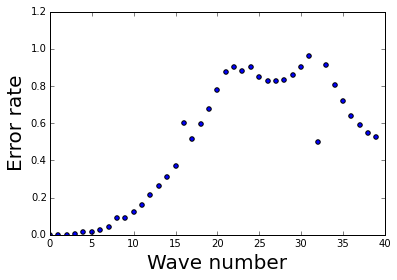

In [9]:
fig = plt.figure()
for y in range (0,40):
    ErrorPlot(y,6)

In [8]:
pp = PdfPages( 'Error of the median filtered sine waves with different wave numbers.pdf')
pp.savefig(fig)
pp.close()